# Problem Statement:
#This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.Understand the factors affecting the demand for these shared bikes in the American market.  understand the factors affecting the demand for these shared bikes in the American market. 
#The company wants to know:
#1. Which variables are significant in predicting the demand for shared bikes.
#2. How well those variables describe the bike demands

# Step 1: Reading and Understanding the Data
#1. import NumPy and Pandas and read the bike sharing dataset

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [124]:
#Supress warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [125]:
#Reading Dataset
bike= pd.read_csv("https://raw.githubusercontent.com/leenagiri98/LendingClubCaseStudy/master/day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [126]:
#Shape Of dataset
bike.shape

(730, 16)

In [127]:
#Get Some Informaiton about the Data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [128]:
#Summary of data set
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [129]:
# get insights of numeric variable
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<AxesSubplot:>

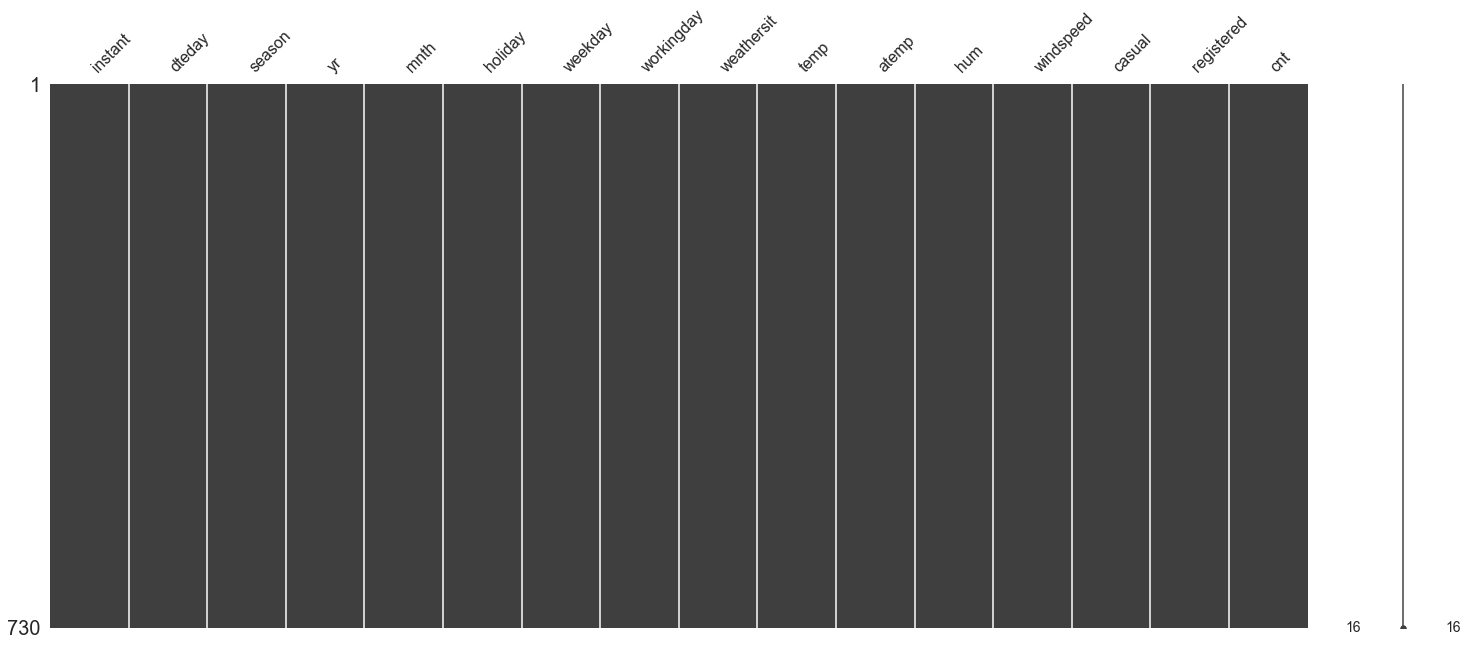

In [130]:
#To check if there are any missing values in the dataset
import missingno as mn
mn.matrix(bike)

In [41]:
# There are no Missing Values in the DataSet

 #### 1. instant column is a record index which does not have any significance in out analysis.
 #### 2. So we will drop the column
 #### 3. The varibles casual and registered are summed up to get cnt which is our target variable. 
 #### 4. Also during prediction we wll not be having these data, so we will drop these two variables which 
 #### we are not going to use in the model.
 #### 5. We are going to use weekday varible which is derived from dteday, so we will not be using dteday and will drop it.
 #### 6. temp and atemp are directly correlated among each other. We will use temp and drop atemp.

In [131]:
bike['dteday'].dtype

dtype('O')

#### Let's convert the datatype of dteday column to datetime.

In [132]:
bike['dteday'] =  pd.to_datetime(bike['dteday'],format='%d-%m-%Y')
bike['dteday'].dtype
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Extracting the Year and Month from the Date

In [133]:
bike['year'] = pd.DatetimeIndex(bike['dteday']).year
bike['month'] = pd.DatetimeIndex(bike['dteday']).month
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [134]:
# Dropping the columns as we have extracte#d the correct year and month from the date.
bike.drop(['yr','mnth'],axis=1,inplace=True)
bike.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [135]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.
bike.drop('holiday',axis=1,inplace=True)
bike.head()

,instant,dteday,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [136]:
# Dropping the dteday,instant,casual and registered columns. AS these columns are not adding any value 

bike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [137]:
# Renaming some columns for better understanding
bike.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


# Step 2: Visualising the Data
#Let's now spend some time doing what is arguably the most important step - understanding the data.
#If there is some obvious multicollinearity going on, this is the first place to catch it
#Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
#We'll visualise our data using matplotlib and seaborn.

## Visualising Numeric Variables
### Below categorical columns are having following catecteristics and can be maped with respective values:
### season
    #1:spring
    #2:summer
    #3:fall
    #4:winter

In [138]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike['season'] = bike['season'].map(codes)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


<AxesSubplot:xlabel='season', ylabel='count'>

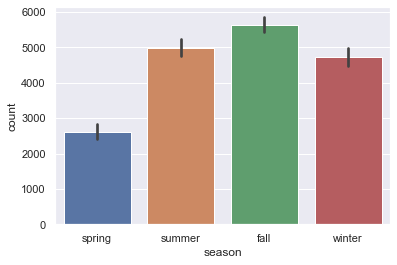

In [50]:
sns.barplot('season','count',data=bike)

### From above Chart Bike Rentals are more during the Fall(Monsoon) season.

### 2) weathersit
    #1: Clear, Few clouds, Partly cloudy, Partly cloudy
    #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [139]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike['weathersit'] = bike['weathersit'].map(codes)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1


<AxesSubplot:xlabel='weathersit', ylabel='count'>

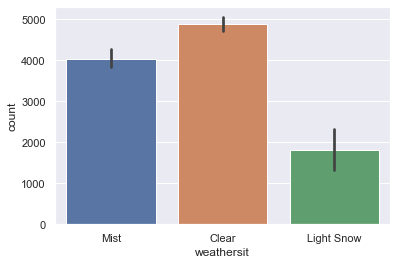

In [140]:
sns.barplot('weathersit','count',data=bike)

### Bikes seem to be rented more in Partly cloudy weather.

3. Workingday
    1. if day is neither weekend nor holiday is 1,
    2. otherwise is 0

In [141]:
codes = {1:'working_day',0:'Holiday'}
bike['workingday'] = bike['workingday'].map(codes)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,6,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,0,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,1,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,2,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,3,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1


<AxesSubplot:xlabel='workingday', ylabel='count'>

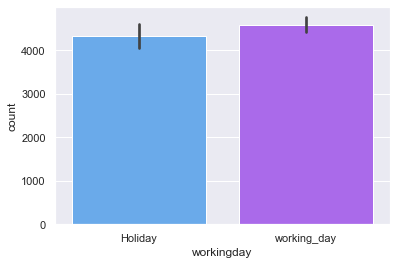

In [142]:
sns.barplot('workingday','count',data=bike,palette='cool')

### Bikes seem to be rented more on working days.

#### 4) year
    1. 2018:0
    2. 2019:1

In [143]:
codes = {2019:1,2018:0}
bike['year'] = bike['year'].map(codes)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,6,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,0,1
1,spring,0,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,0,1
2,spring,1,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,1
3,spring,2,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,1
4,spring,3,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,1


<AxesSubplot:xlabel='year', ylabel='count'>

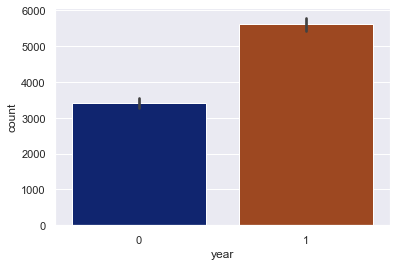

In [144]:
sns.barplot('year','count',data=bike,palette='dark')

### Bike Rental popularity has increased in 2019 when compared to 2018

#### 5) Month
    1:Jan
    2:Feb
    3:Mar
    4:Apr
    5:May
    6:June
    7:July
    8:Aug
    9:Sep
    10:Oct
    11:Nov
    12:Dec

In [145]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['month'] = bike['month'].map(codes)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,6,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,0,Jan
1,spring,0,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,0,Jan
2,spring,1,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,Jan
3,spring,2,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,Jan
4,spring,3,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,Jan


<AxesSubplot:xlabel='month', ylabel='count'>

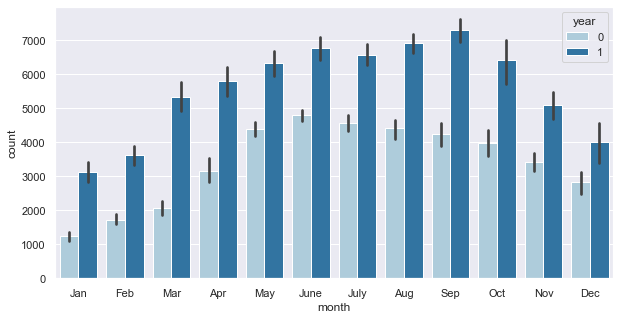

In [146]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike,palette='Paired')

#### 6) WeekDay:
    0:Mon
    1:Tue
    2:Wed
    3:Thu
    4:Fri
    5:Sat
    6:Sun

In [147]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['weekday'] = bike['weekday'].map(codes)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,Jan


<AxesSubplot:xlabel='weekday'>

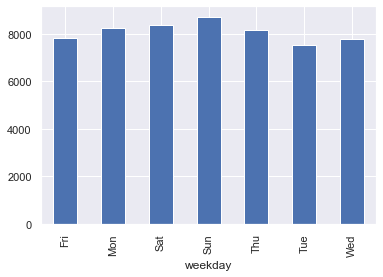

In [148]:
bike.groupby('weekday')['count'].max().plot(kind='bar')

### Bike Rentals are maximum on Sunday and Monday¶

7) temp

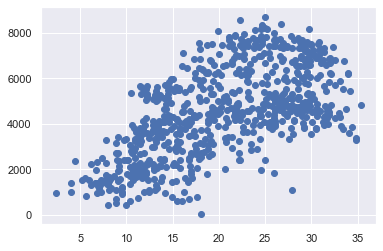

In [149]:
plt.scatter('temp','count',data=bike)

### Bike Rentals are observed at higher temperatures.

8) atemp

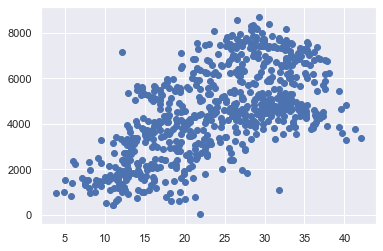

In [150]:
plt.scatter('atemp','count',data=bike)

### Bike Rentals are observed at higher "feel-like" temperatures.

9) Humidity

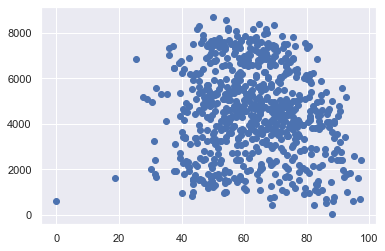

In [151]:
plt.scatter('humidity','count',data=bike)

### Temperature being directly proportional to Humidity, Bike Rentals are making during high humidity.

10) Windspeed

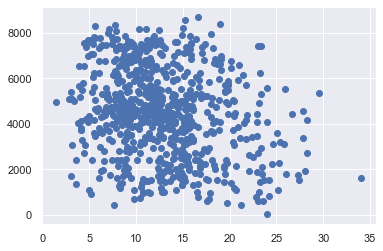

In [152]:
plt.scatter('windspeed','count',data=bike)

In [121]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp         730 non-null    float64
 1   humidity     730 non-null    float64
 2   windspeed    730 non-null    float64
 3   count        730 non-null    int64  
 4   year         730 non-null    int64  
 5   spring       730 non-null    uint8  
 6   summer       730 non-null    uint8  
 7   winter       730 non-null    uint8  
 8   working_day  730 non-null    uint8  
 9   Light Snow   730 non-null    uint8  
 10  Mist         730 non-null    uint8  
 11  Aug          730 non-null    uint8  
 12  Dec          730 non-null    uint8  
 13  Feb          730 non-null    uint8  
 14  Jan          730 non-null    uint8  
 15  July         730 non-null    uint8  
 16  June         730 non-null    uint8  
 17  Mar          730 non-null    uint8  
 18  May          730 non-null    uint8  
 19  Nov     

# Univariate analaysis
### visualise the pattern of demand (target variable - 'cnt') over period of two years

### Wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly 
### correlated with the temperature.

<AxesSubplot:xlabel='count', ylabel='Density'>

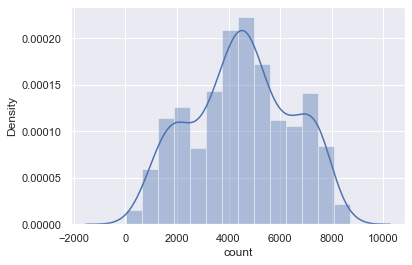

In [66]:
sns.distplot(bike['count'])

# Step 3: Visualizing the Relationship among variables
Let's now spend some time doing what is arguably the most important step - understanding the data.
If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

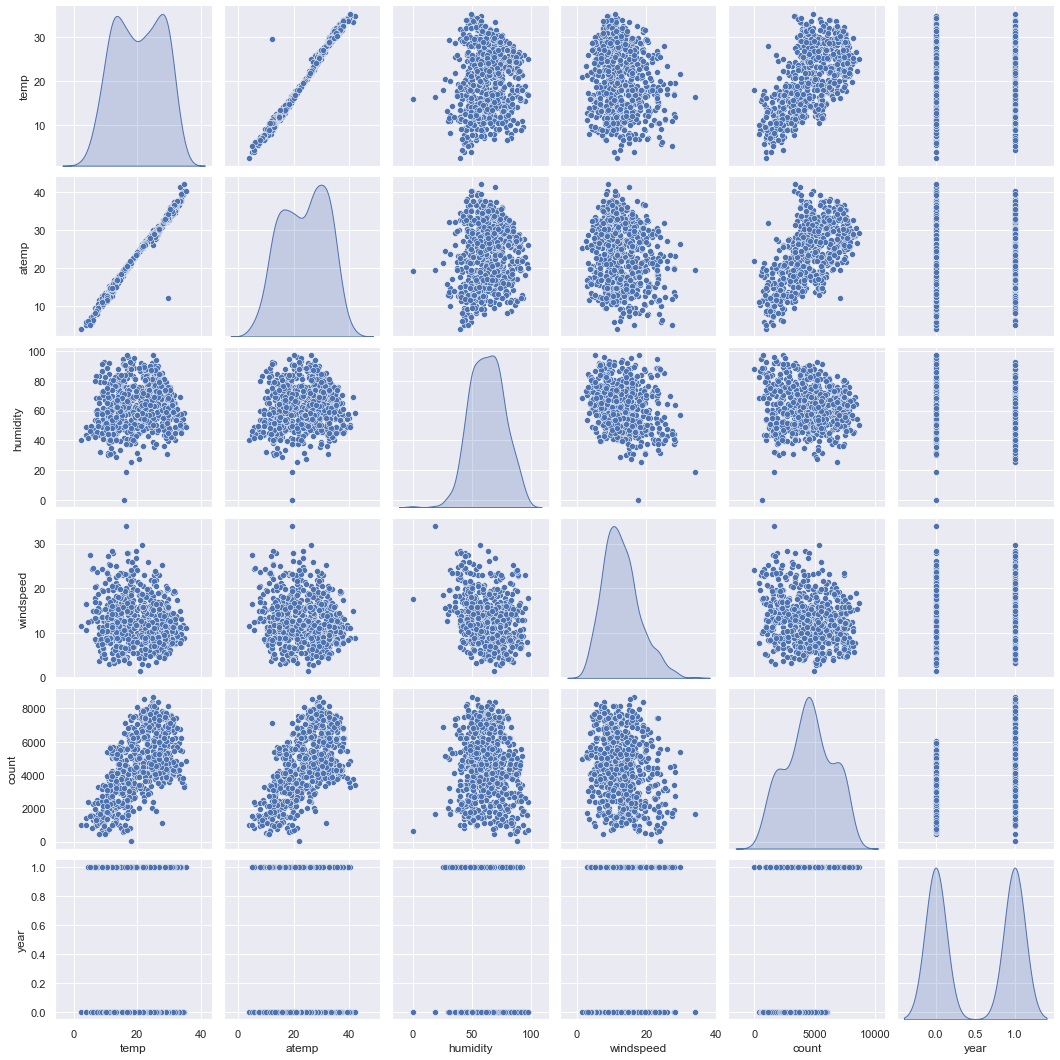

In [156]:
sns.pairplot(bike.select_dtypes(['int64','float64']), diag_kind='kde')
plt.show()

# From the above pairplot we could observe that, temp has highest positive correlation with target variable cnt.

<AxesSubplot:>

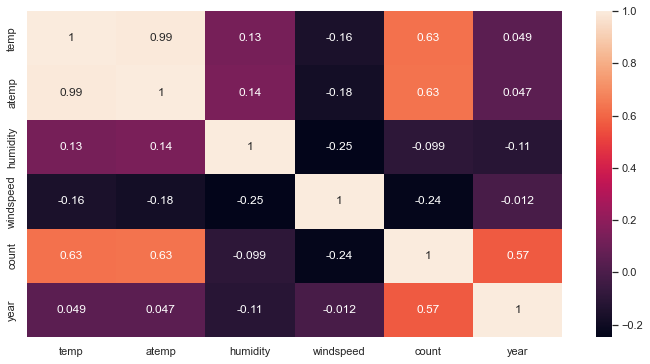

In [68]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (12,6))
sns.heatmap(bike.corr(),annot=True)

## We could infer follwing observation:
#### 1.  A positive correalation observed between cnt and temp (0.63)
#### 2.  A Negative correlation observed for cnt with hum and windspeed (-0.099 and -0.24)

<AxesSubplot:>

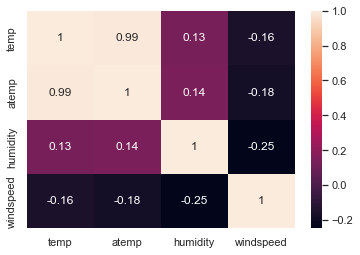

In [69]:
data= bike[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

### It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.

In [70]:
bike.drop('atemp',axis=1,inplace=True)
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


# Step 4 : Dealing With Categorical Variables
Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

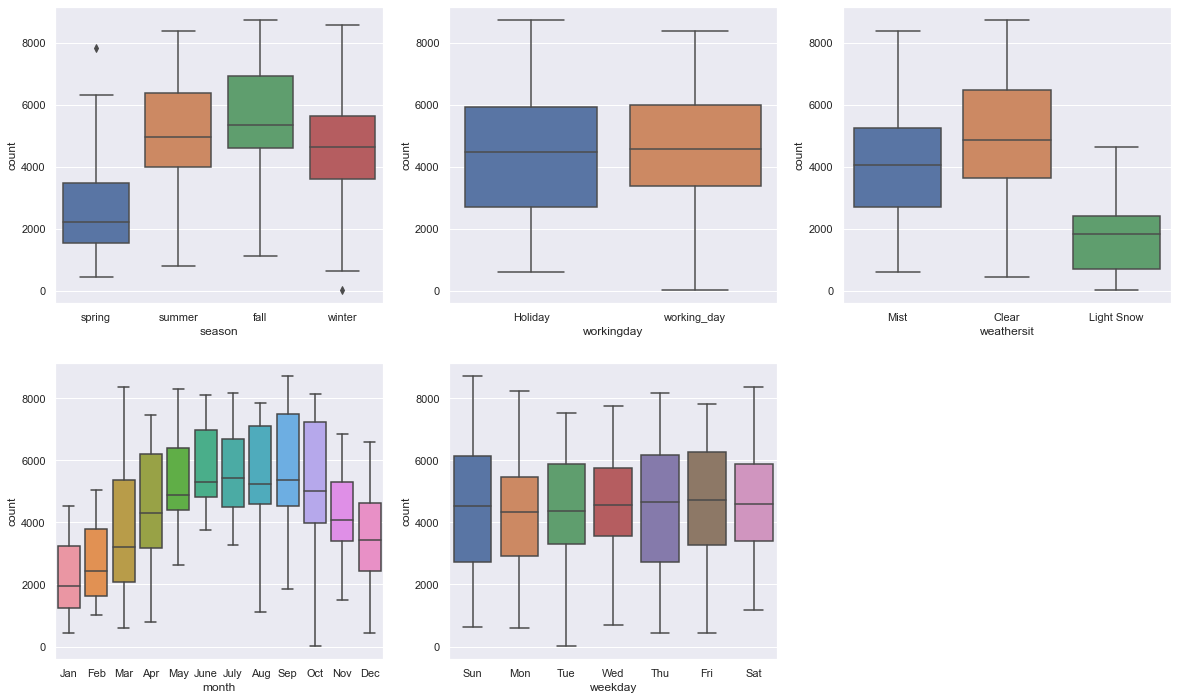

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [71]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.show()
plt.figure(figsize=(20, 12))

In [157]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,Jan


### Dummy Varibale

In [158]:
seasons = pd.get_dummies(bike['season'],drop_first=True)

working_day = pd.get_dummies(bike['workingday'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['month'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,Jan


In [74]:
bike= pd.concat([bike,seasons,working_day,weather,month,week_day],axis=1)
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,1,0,0,0
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,1,0,0,0,0,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,0,1,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,1
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,0,0,1,0,0


In [75]:
# Dropping the categorical variables as they are already dummy-encoded.

bike.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)
bike.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Step 5: Splitting the Data into Training and Testing Sets

In [76]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(219, 28)


In [77]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

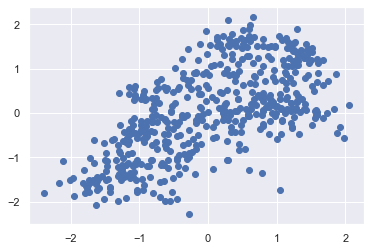

In [78]:
# Apply scaler() to all the columns except the'dummy' variables.
num_vars=['temp','humidity','windspeed','count']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
plt.scatter('temp','count',data=df_train)

So, we pick area as the first variable and we'll try to fit a regression line to that.

## Dividing into X and Y sets for the model building

In [79]:
y_train = df_train.pop('count')
X_train = df_train

# Step 5: Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, 
you need to explicitly fit a constant using sm.add_constant(X) because if 
we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [80]:
#Using Recursive feature elimination(RFE) for automated Feature Selection approach
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 16),
 ('Tue', False, 12),
 ('Wed', False, 13)]

In [82]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [83]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [84]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [85]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.30e-179
Time:                        03:40:21   Log-Likelihood:                -285.08
No. Observations:                 510   AIC:                             592.2
Df Residuals:                     499   BIC:                             638.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6092      0.122     -4.974      0.000      -0.850      -0.369
temp            0.3984      0.027     14.773      0.000       0.345       0.451
year            1.0451      0.038     27.326      0.000       0.970       1.120
spring         -0.6819      0.056    -12.116      0.000      -0.792      -0.571
working_day     0.4421      0.122      3.633      0.000       0.203       0.681
Light Snow     -1.3226      0.114    -11.586      0.000      -1.547      -1.098
Mist           -0.3671      0.041     -8.999      0.000      -0.447      -0.287
July           -0.3011      0.081     -3.734      0.000      -0.460      -0.143
Sep             0.2845      0.073      3.900      0.000       0.141       0.428
Mon             0.2462      0.129      1.902      0.058      -0.008       0.500
Sun             0.4841      0.129      3.762      0.000       0.231       0.737
==============================================================================
Omnibus:                       59.973   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.538
Skew:                          -0.597   Prob(JB):                     4.57e-34
Kurtosis:                       5.408   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping Mon as it is insignificant.

In [86]:
X_train1= X_train_rfe.drop('Mon',1)
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.22e-179
Time:                        03:40:21   Log-Likelihood:                -286.92
No. Observations:                 510   AIC:                             593.8
Df Residuals:                     500   BIC:                             636.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4002      0.054     -7.374      0.000      -0.507      -0.294
temp            0.3999      0.027     14.797      0.000       0.347       0.453
year            1.0458      0.038     27.273      0.000       0.970       1.121
spring         -0.6842      0.056    -12.129      0.000      -0.795      -0.573
working_day     0.2327      0.052      4.476      0.000       0.131       0.335
Light Snow     -1.3185      0.114    -11.522      0.000      -1.543      -1.094
Mist           -0.3647      0.041     -8.922      0.000      -0.445      -0.284
July           -0.2972      0.081     -3.676      0.000      -0.456      -0.138
Sep             0.2757      0.073      3.777      0.000       0.132       0.419
Sun             0.2749      0.067      4.102      0.000       0.143       0.407
==============================================================================
Omnibus:                       62.219   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.183
Skew:                          -0.617   Prob(JB):                     1.65e-35
Kurtosis:                       5.452   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we have all the variables with p-value less than 0.05.

In [87]:
X_train_new= X_train2.drop('const',axis=1)

In [88]:
bike.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Variance Inflation Factor(VIF)
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature
variables are correlated with each other. It is an extremely important parameter to test our linear model. 
The formula for calculating VIF is:
𝑉𝐼𝐹𝑖=1/1−(𝑅𝑖)^2

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.28
0,temp,2.02
2,spring,2.02
1,year,1.80
5,Mist,1.50
6,July,1.35
8,Sun,1.28
7,Sep,1.17
4,Light Snow,1.06


# All the variables have VIF less than 5 and it's perfect!

In [168]:
# List down final model varibales and its coefficients

# assign final model to lm1


# list down and check variables of final model
var_final = list(lm1.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm1.params,3))

Final Selected Variables: ['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July', 'Sep', 'Sun']

Coefficent for the variables are:
const         -0.400
temp           0.400
year           1.046
spring        -0.684
working_day    0.233
Light Snow    -1.319
Mist          -0.365
July          -0.297
Sep            0.276
Sun            0.275
dtype: float64


# Step 7: Residual Analysis of the train data

Text(0.5, 0, 'Errors')

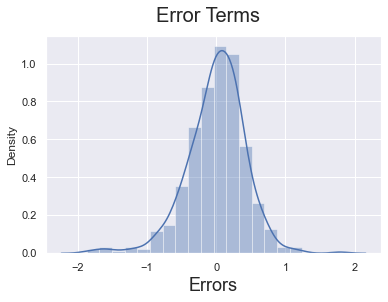

In [90]:
y_train_pred = lm1.predict(X_train2)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

# The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

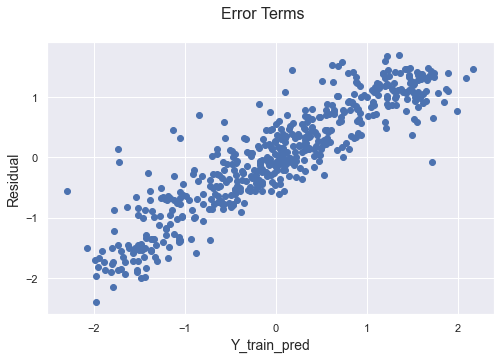

In [160]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,y_train_pred)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

### It seems like the corresponding residual plot is reasonably random.
### Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

In [ ]:
# Step 8: Making Predictions

In [91]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [92]:
df_test.describe()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.096083,-0.081388,-0.043731,0.031073,0.479452,0.255708,0.264840,0.232877,0.698630,0.027397,...,0.086758,0.073059,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384
std,1.035793,1.022197,0.942916,0.973536,0.500722,0.437258,0.442259,0.423633,0.459904,0.163612,...,0.282125,0.260830,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472
min,-2.174744,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.809372,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.094973,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.983209,0.641963,0.485055,0.709202,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.981904,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [93]:
y_test = df_test.pop('count')
X_test = df_test

In [94]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [95]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_test_pred = lm1.predict(X_test_new)

# Step 9: Model Evaluation

Text(0, 0.5, 'Predictions')

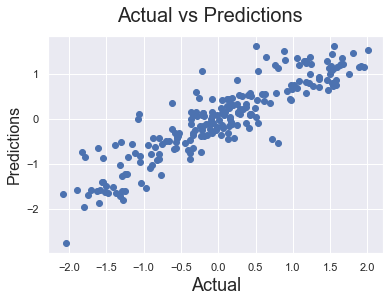

In [96]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8075114920782749

In [166]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.808


In [170]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

from sklearn.metrics import r2_score, mean_squared_error
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))
Mean_Squared_Error : 0.0096

Adj. R-Squared for Test dataset:  0.799
Mean_Squared_Error : 0.1816


# Conclusion:

In [171]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm1.rsquared,2), '  Adj. R-Squared train:', round(lm1.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm1.params,3))

R- Sqaured train:  0.82   Adj. R-Squared train: 0.816
R- Sqaured test :  0.81   Adj. R-Squared test : 0.799

Coefficent for the variables are:
const         -0.400
temp           0.400
year           1.046
spring        -0.684
working_day    0.233
Light Snow    -1.319
Mist          -0.365
July          -0.297
Sep            0.276
Sun            0.275
dtype: float64


### The equation of our best fitted line is:
    cnt=0.097+(0.256×yr)+(0.097×holiday)+(0.552×temp)−(0.135×windspeed)+(0.092×SeasonSummer)+
    (0.143×SeasonWinter)+(0.093×MonthSep)−(0.085×WeathersitMistCloudy)−(0.264×weathersitLightSnowLightRain) 
    1.  From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the 
        above variables can well explain more than 80% of bike demand. oeffiencients of the variables explains
        the factors effecting the bike demand
    2. Based on final model top three features contributing significantly towards explaining the demand are:
        1. Temperature (0.552)
        2. weathersit : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.264)
        3. year (0.256)
    3. So it recomended to give these variables utmost importance while planning to achieve maximum demand.

# Assumptions of Linear Regression:
### The error terms are normally distributed.
### The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
### The predicted values have linear relationship with the actual values.